Using logtime arrows

Using auto arrows



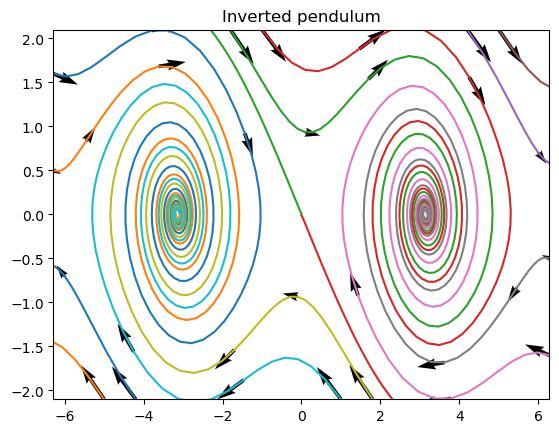

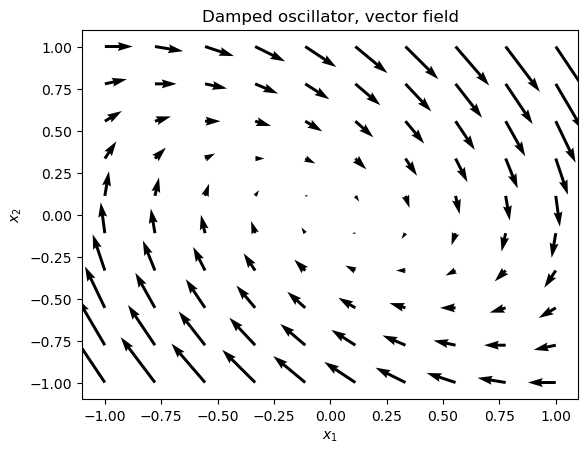

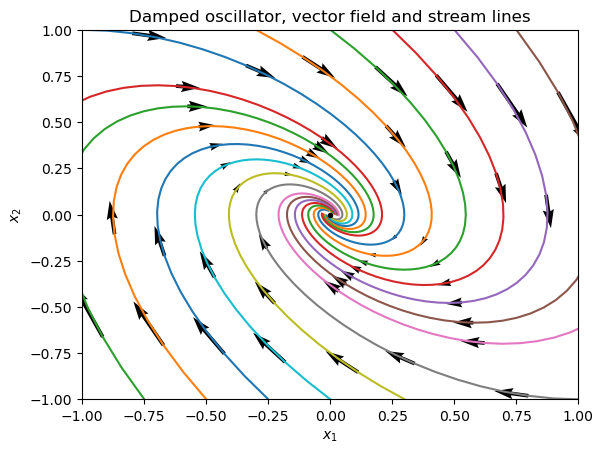

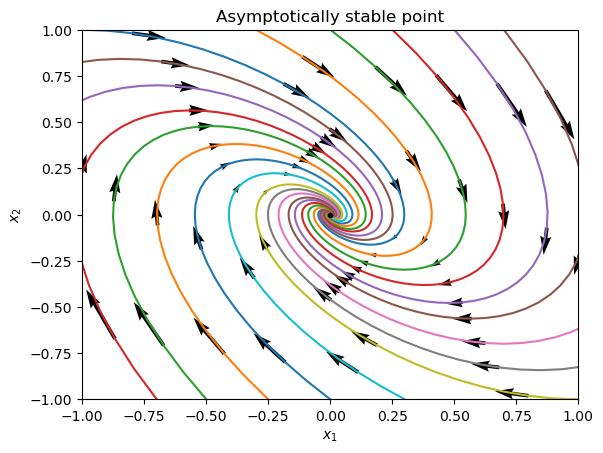

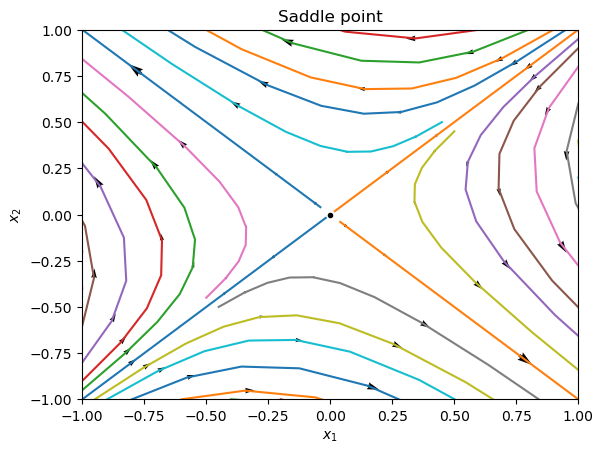

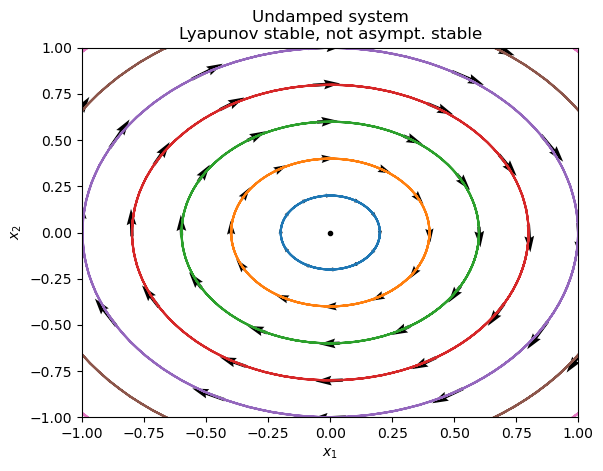

In [2]:
# phaseplots.py - examples of phase portraits
# RMM, 24 July 2011
#
# This file contains examples of phase portraits pulled from "Feedback
# Systems" by Astrom and Murray (Princeton University Press, 2008).

import os

import numpy as np
import matplotlib.pyplot as plt
from control.phaseplot import phase_plot
from numpy import pi

# Clear out any figures that are present
plt.close('all')

#
# Inverted pendulum
#

# Define the ODEs for a damped (inverted) pendulum
def invpend_ode(x, t, m=1., l=1., b=0.2, g=1):
    return x[1], -b/m*x[1] + (g*l/m)*np.sin(x[0])


# Set up the figure the way we want it to look
plt.figure()
plt.clf()
plt.axis([-2*pi, 2*pi, -2.1, 2.1])
plt.title('Inverted pendulum')

# Outer trajectories
phase_plot(
    invpend_ode,
    X0=[[-2*pi, 1.6], [-2*pi, 0.5], [-1.8, 2.1],
        [-1, 2.1], [4.2, 2.1], [5, 2.1],
        [2*pi, -1.6], [2*pi, -0.5], [1.8, -2.1],
        [1, -2.1], [-4.2, -2.1], [-5, -2.1]],
    T=np.linspace(0, 40, 200),
    logtime=(3, 0.7)
)

# Separatrices
phase_plot(invpend_ode, X0=[[-2.3056, 2.1], [2.3056, -2.1]], T=6, lingrid=0)

#
# Systems of ODEs: damped oscillator example (simulation + phase portrait)
#

def oscillator_ode(x, t, m=1., b=1, k=1):
    return x[1], -k/m*x[0] - b/m*x[1]


# Generate a vector plot for the damped oscillator
plt.figure()
plt.clf()
phase_plot(oscillator_ode, [-1, 1, 10], [-1, 1, 10], 0.15)
#plt.plot([0], [0], '.')
# a=gca; set(a,'FontSize',20); set(a,'DataAspectRatio',[1,1,1])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Damped oscillator, vector field')

# Generate a phase plot for the damped oscillator
plt.figure()
plt.clf()
plt.axis([-1, 1, -1, 1])  # set(gca, 'DataAspectRatio', [1, 1, 1]);
phase_plot(
    oscillator_ode,
    X0=[
        [-1, 1], [-0.3, 1], [0, 1], [0.25, 1], [0.5, 1], [0.75, 1], [1, 1],
        [1, -1], [0.3, -1], [0, -1], [-0.25, -1], [-0.5, -1], [-0.75, -1], [-1, -1]
    ],
    T=np.linspace(0, 8, 80),
    timepts=[0.25, 0.8, 2, 3]
)
plt.plot([0], [0], 'k.')  # 'MarkerSize', AM_data_markersize*3)
# set(gca, 'DataAspectRatio', [1,1,1])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Damped oscillator, vector field and stream lines')

#
# Stability definitions
#
# This set of plots illustrates the various types of equilibrium points.
#


def saddle_ode(x, t):
    """Saddle point vector field"""
    return x[0] - 3*x[1], -3*x[0] + x[1]


# Asy stable
m = 1
b = 1
k = 1  # default values
plt.figure()
plt.clf()
plt.axis([-1, 1, -1, 1])  # set(gca, 'DataAspectRatio', [1 1 1]);
phase_plot(
    oscillator_ode,
    X0=[
        [-1, 1], [-0.3, 1], [0, 1], [0.25, 1], [0.5, 1], [0.7, 1], [1, 1], [1.3, 1],
        [1, -1], [0.3, -1], [0, -1], [-0.25, -1], [-0.5, -1], [-0.7, -1], [-1, -1],
        [-1.3, -1]
    ],
    T=np.linspace(0, 10, 100),
    timepts=[0.3, 1, 2, 3],
    parms=(m, b, k)
)
plt.plot([0], [0], 'k.')  # 'MarkerSize', AM_data_markersize*3)
# plt.set(gca,'FontSize', 16)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Asymptotically stable point')

# Saddle
plt.figure()
plt.clf()
plt.axis([-1, 1, -1, 1])  # set(gca, 'DataAspectRatio', [1 1 1])
phase_plot(
    saddle_ode,
    scale=2,
    timepts=[0.2, 0.5, 0.8],
    X0=[
        [-1, -1], [1, 1],
        [-1, -0.95], [-1, -0.9], [-1, -0.8], [-1, -0.6], [-1, -0.4], [-1, -0.2],
        [-0.95, -1], [-0.9, -1], [-0.8, -1], [-0.6, -1], [-0.4, -1], [-0.2, -1],
        [1, 0.95], [1, 0.9], [1, 0.8], [1, 0.6], [1, 0.4], [1, 0.2],
        [0.95, 1], [0.9, 1], [0.8, 1], [0.6, 1], [0.4, 1], [0.2, 1],
        [-0.5, -0.45], [-0.45, -0.5], [0.5, 0.45], [0.45, 0.5],
        [-0.04, 0.04], [0.04, -0.04]
    ],
    T=np.linspace(0, 2, 20)
)
plt.plot([0], [0], 'k.')  # 'MarkerSize', AM_data_markersize*3)
# set(gca,'FontSize', 16)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Saddle point')

# Stable isL
m = 1
b = 0
k = 1  # zero damping
plt.figure()
plt.clf()
plt.axis([-1, 1, -1, 1])  # set(gca, 'DataAspectRatio', [1 1 1]);
phase_plot(
    oscillator_ode,
    timepts=[pi/6, pi/3, pi/2, 2*pi/3, 5*pi/6, pi, 7*pi/6,
             4*pi/3, 9*pi/6, 5*pi/3, 11*pi/6, 2*pi],
    X0=[[0.2, 0], [0.4, 0], [0.6, 0], [0.8, 0], [1, 0], [1.2, 0], [1.4, 0]],
    T=np.linspace(0, 20, 200),
    parms=(m, b, k)
)
plt.plot([0], [0], 'k.')  # 'MarkerSize', AM_data_markersize*3)
# plt.set(gca,'FontSize', 16)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Undamped system\nLyapunov stable, not asympt. stable')

if 'PYCONTROL_TEST_EXAMPLES' not in os.environ:
    plt.show()